<a href="https://colab.research.google.com/drive/1tElT3FhddabqCyJKFH27rhnyXJTqrzke?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors (KNN)

## Introduction

The k Nearest Neighbors method (kNN) is a very popular classification method, also sometimes used in regression tasks. It's one of the most understandable approaches to classification. Intuitively, the essence of the method is: look at the neighbors; the predominant ones indicate what you are. Formally, the basis of the method is the compactness hypothesis: if the distance metric between examples is introduced successfully, then similar examples are much more likely to be in the same class than in different ones.

<img src='https://hsto.org/web/68d/a45/6f0/68da456f00f8434e87628dbe7e3f54a7.png' width=600>

 For the classification of each object in the test dataset, it is necessary to sequentially perform the following operations:
   * Calculate the distance to each of the objects in the training dataset.
   * Select objects from the training dataset to which the distance is minimal.
   * The class of the classified object is the class most frequently occurring among the k nearest neighbors.

We will work with a subset of the [Covertype dataset from the UCI repository](http://archive.ics.uci.edu/ml/datasets/Covertype). There are 7 different classes available. Each object is described by 54 features, 40 of which are binary. The data description is available at the link.

## Preprocessing

In [1]:
import pandas as pd
import numpy as np

Press [here](https://drive.google.com/file/d/1Z39LNnF4lOj4iT48YDYFZNPDBglMd0TZ/view?usp=sharing) to download the dataset.

In [5]:
all_data = pd.read_csv('forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [7]:
all_data.shape

(10000, 55)

Extract the class labels into a variable `labels`, and the feature descriptions into a variable `feature_matrix`. Since the data is numerical and does not have missing values, we will convert it to `numpy` format using the `.values` method.

In [9]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

## Train-test split

In [11]:
from sklearn.model_selection import train_test_split

We will now work with all 7 types of cover (the data is already in the variables `feature_matrix` and `labels` if you haven't redefined them). Divide the sample into training and test sets using the `train_test_split` method.


In [13]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

The main objects in `sklearn` are the so-called `estimators`. They are divided into **classifiers** and **regressors**.

As examples of models, you can consider the classifiers
[k Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and
[logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

All models in `sklearn` must have at least 2 methods  -- `fit` and `predict`.
The `fit(X, y)` method is responsible for training the model and takes as input a training sample in the form of a *feature matrix* $X$ and a *response vector* $y$.

After `fit`, you can now call the `predict(X)` method on the trained model, which will return predictions of this model on all objects from the matrix $X$ in the form of a vector.

You can call `fit` on the same model several times; each time it will be trained anew on the given dataset.

Also, models have *hyperparameters*, which are usually set when creating the model.

Let's see all this on the example of logistic regression.


In [15]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression(C=1)
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now, we would like to measure the quality of our model. For this, we can use the `score(X, y)` method, which will calculate some error function on the sample $X, y$, but exactly which one depends on the model. Alternatively, one of the functions from the `metrics` module can be used, for example, [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), which, as the name suggests, will calculate the accuracy of predictions for us.


In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred)

0.6075

Finally, the last thing we would like to mention is grid search for hyperparameter tuning. Since models have many hyperparameters that can be changed, and the quality of the model significantly depends on these hyperparameters, it would be desirable to find the best parameters in this sense. The simplest way to do this is to just iterate over all possible variants within reasonable limits.

This can be done using the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class, which conducts a search (search) across a grid (grid) and calculates the quality of the model using cross-validation (CV).

For example, in logistic regression, you can change the `C` and `penalty` parameters. Let's do that. Keep in mind that the search may take a long time. Refer to the documentation for the meaning of the parameters.


In [21]:
from sklearn.model_selection import GridSearchCV

In [23]:
clf = LogisticRegression(solver='saga')

# init GridSearchCV with parameters
param_grid = {
    'C': np.arange(1, 5),
    'penalty': ['l1', 'l2'],
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

search.fit(feature_matrix, labels)

print(search.best_params_)

{'C': 3, 'penalty': 'l2'}


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In this case, the search iterates over all possible pairs of values for `C` and `penalty` from the specified sets.


In [25]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.6418

Note that we pass the entire dataset to GridSearchCV, not just its training part. This can be done because the search still uses cross-validation. However, sometimes a *validation* part is still separated from the dataset, as the hyperparameters might overfit to the sample during the search process.

In the tasks, you will need to repeat this for the k Nearest Neighbors method.

# Homework

The quality of classification/regression by the k Nearest Neighbors method depends on several parameters:
* the number of neighbors `n_neighbors`
* the distance metric between objects `metric`
* the weights of neighbors (the neighbors of the test example can enter with different weights, for example, the further the example, the less its "voice" is taken into account) `weights`


Train the `KNeighborsClassifier` on the dataset.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

0.7315

Let's select the parameters of our model:

* Iterate over the grid from `1` to `10` for the number of neighbors parameter
* Also, try using different metrics: `['manhattan', 'euclidean']`
* Try using different weight calculation strategies: `[‘uniform’, ‘distance’]`

In [31]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": np.arange(1,11),
          "p": [1,2],
          "weights": ['uniform', 'distance']
         }

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(feature_matrix, labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

Let's output the best parameters

In [33]:
clf_grid.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Using the optimal number of neighbors found, calculate the probabilities of belonging to classes for the test sample (`.predict_proba`).

In [37]:
optimal_clf = KNeighborsClassifier(n_neighbors = 4, p=1, weights='distance')
# Training ...
optimal_clf.fit(train_feature_matrix, train_labels)
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

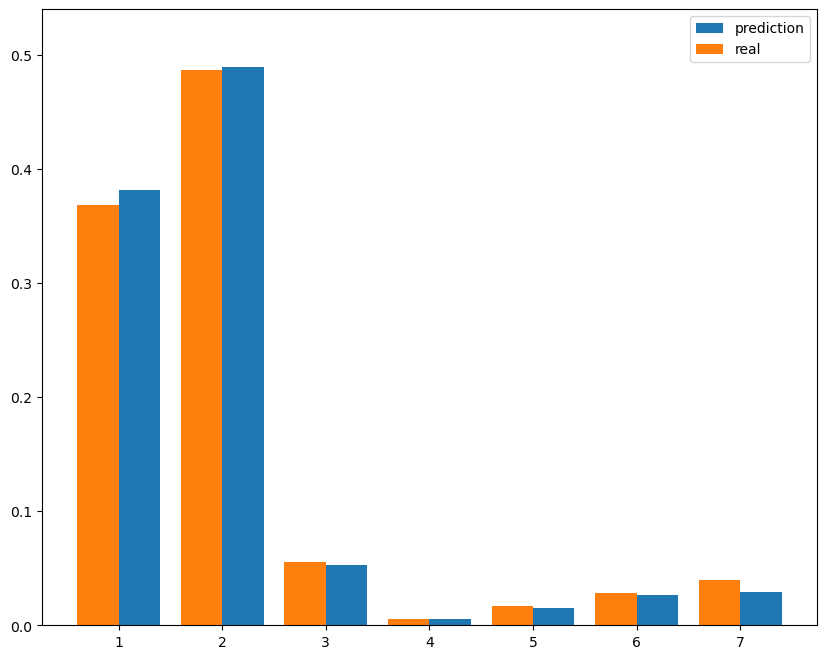

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

## Conclusion

What is the quality of the model on the test sample? Compare it with the quality of logistic regression. Which model is better? Why? What are the pros and cons of the k Nearest Neighbors method? Plot the ROC curve for the k Nearest Neighbors method. Calculate the area under the ROC curve (AUC-ROC).

Качество модели kNN

In [48]:
y_pred = optimal_clf.predict(test_feature_matrix)
accuracy_score(test_labels, y_pred)

0.785

Точность **kNN** составила 78,5%, а точность **логистической регрессии** - 64,18%. kNN работает лучше

Почему **KNN** лучше?
- Он учитывает сложные зависимости в данных, а логистическая регрессия пытается провести простое линейное разделение, что не всегда подходит.
- **KNN** не делает строгих предположений о данных, поэтому может работать лучше, если классы сложно разделить.

Но у **KNN** есть минусы:
- Он медленный на больших данных, потому что хранит всю обучающую выборку.
- Чувствителен к шумам и требует подбора параметров (например, числа соседей).

**Логистическая регрессия** проигрывает, но у неё есть плюсы:
- Быстрее работает, особенно на больших данных.
- Её проще интерпретировать.
*****
**Вывод:**
Если важна точность и данные сложные — лучше KNN. Если нужна скорость и простота — можно попробовать улучшить логистическую регрессию

## Построение ROC curve для каждого класса

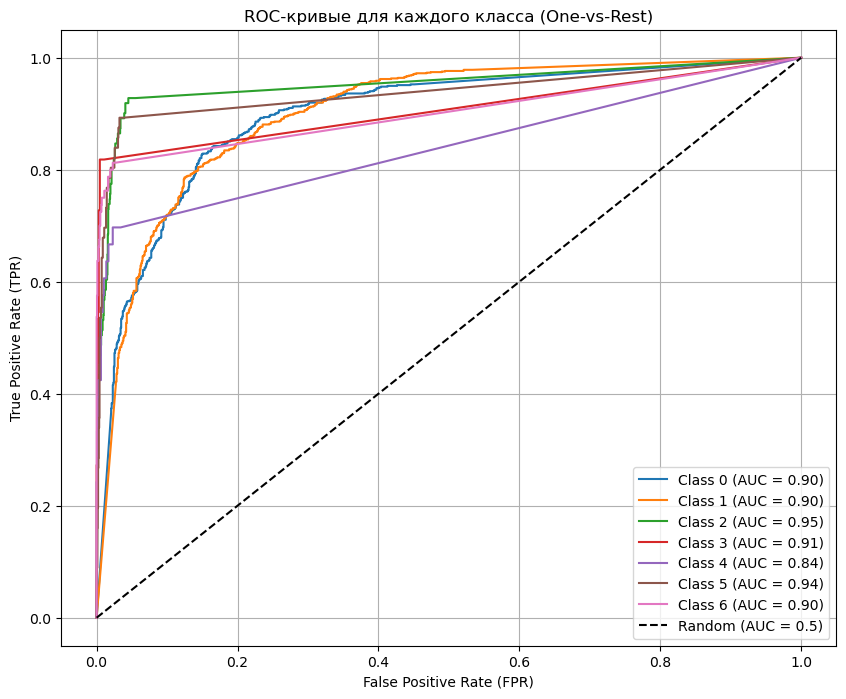

Micro-average AUC-ROC: 0.956


In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Бинаризация меток для OvR
labels_test_bin = label_binarize(test_labels, classes=np.unique(labels))
n_classes = labels_test_bin.shape[1]

# Построение ROC-кривой для каждого класса (OvR)
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(labels_test_bin[:, i], pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривые для каждого класса (One-vs-Rest)')
plt.legend()
plt.grid()
plt.show()

# Микро-усредненный AUC-ROC (объединяет все классы)
fpr_micro, tpr_micro, _ = roc_curve(labels_test_bin.ravel(), pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
print(f"Micro-average AUC-ROC: {roc_auc_micro:.3f}")